# **Audio Dataset Preprocessing**
These are preprocessing syntax from raw data (.ogg, .acc, .mp3) into wav

## **Import Dependecies**

In [1]:
import os
import shutil
import random
import librosa
import numpy as np
import soundfile as sf
import re
import matplotlib.pyplot as plt

from pathlib import Path
from pydub import AudioSegment
from pydub.playback import play
from scipy.io.wavfile import read

from IPython.display import clear_output


c:\Users\Ahmad Ulfi\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## **Change Directory**

In [2]:
parent_dir = "d:/1mportant!/bangkit/capstone/"

In [3]:
os.chdir(parent_dir)

In [53]:
def file_to_wav(filepath,name, outputpath):
    '''Convert files to .wav'''
    file = AudioSegment.from_file(filepath, channels=1)+2
    file.export(f"{outputpath}{name}.wav", format="wav")

In [54]:
data_dir = "New Data"
ext = [".aac",".ogg",".mpeg",".mp3",".wav",".mp4"]

In [55]:
def convert(data_dir):
    outdir = 'New Data/WAV'
    for file in sorted(os.listdir(data_dir)):
        #Get all files
        filename = os.fsdecode(file)
        
        #Validating files extension
        if filename.endswith(tuple(ext)):
            #Get file dir
            file_dir = os.path.join(data_dir,filename)
            print(f'Converting {filename}')
            #print(file_dir)
            searchinsiden = re.findall(r'(begal|rampok|maling|pencuri|tabrakan|kecelakaan|kebakaran|random)',file_dir.lower())
            insiden = searchinsiden[0]

            outputpath = os.path.join(outdir,insiden+"/")
            #Make name
            i = 1
            nama = searchinsiden[0] + f"_{i}"

            while nama +".wav" in os.listdir(outputpath):
                i += 1
                nama = searchinsiden[0] + f"_{i}"
        
            file_to_wav(file_dir,nama,outputpath)
        else :
            pass

In [56]:
insiden = ["begal","rampok","maling","pencuri","tabrakan","kecelakaan","kebakaran","random"]

In [57]:
#Iterate in files

for i in insiden:
    convert(f'New Data/{i}/')

Converting Begal 12.mp3
Converting Begal 13.mp3
Converting Begal Adfi.aac
Converting Begal Alfa.ogg
Converting Begal Angel.aac
Converting Begal Ara.ogg
Converting Begal Ardo.wav
Converting Begal Ario.ogg
Converting Begal Audi.mp4
Converting Begal Brina.ogg
Converting Begal Dea.ogg
Converting Begal Falah.ogg
Converting Begal Herlinda.ogg
Converting Begal Husein.ogg
Converting Begal Ijak.ogg
Converting Begal Ilyas.ogg
Converting Begal Ilyass.ogg
Converting Begal Izul.ogg
Converting Begal Jaki.ogg
Converting Begal Kipli.aac
Converting Begal Nibros.ogg
Converting Begal Nuna.ogg
Converting Begal Razik.ogg
Converting Begal Tian.ogg
Converting Begal Zaidan.ogg
Converting begal 1.mp3
Converting begal 10.mp3
Converting begal 11.mp3
Converting begal 2.mp3
Converting begal 3.mp3
Converting begal 4.mp3
Converting begal 5.mp3
Converting begal 6.mp3
Converting begal 7.mp3
Converting begal 8.mp3
Converting begal 9.mp3
Converting begal_1.mp3
Converting begal_1.wav
Converting begal_10.mp3
Converting be

In [58]:
Hujan = AudioSegment.from_file('New Data\SFX\Hujan SFX.mp3', channels=1)-10
Jalanan = AudioSegment.from_file('New Data\SFX\Jalanan SFX.mp3', channels=1)-10

SFX = [Hujan, Jalanan]

In [59]:
def overlay(filepath, outputpath):
    '''Memberi overlay pada audio file dengan 2 skenario tambahan'''
    #Import File
    file = AudioSegment.from_file(filepath, channels=1)
    name = Path(filepath).stem
    len_audio = len(file)
    label = ['HUJAN', 'JALANAN']
    #print("File Imported")
    i = 0

    for gangguan in SFX:
        max = len(gangguan)-len_audio #Membatasi maksimal randomize agar tidak mengambil part kosong
        part = random.randrange(0,max) #Mencari random length
        #print('Dapat Rand Range')
        output = file.overlay(gangguan[part:]) #Memberi overlay pada audiofile
        current_label = label[i]
        i += 1
        #print('Conver Berhasil')
        output.export("{}{}_{}.wav".format(outputpath, name, current_label), format="wav") #Eksport dan memberi label sesuai gangguan
        
        clear_output(wait=True)
        print("[Overlaying \"{}\" with \"{}\" Succeed]".format(name, current_label))

In [60]:

def get_array(path,event, iteration):
    file = f'{path}{event}/{event}_{iteration}.wav'
    _, array = read(file)
    return array

In [61]:
test = range(1,70)
iterator = iter(test)

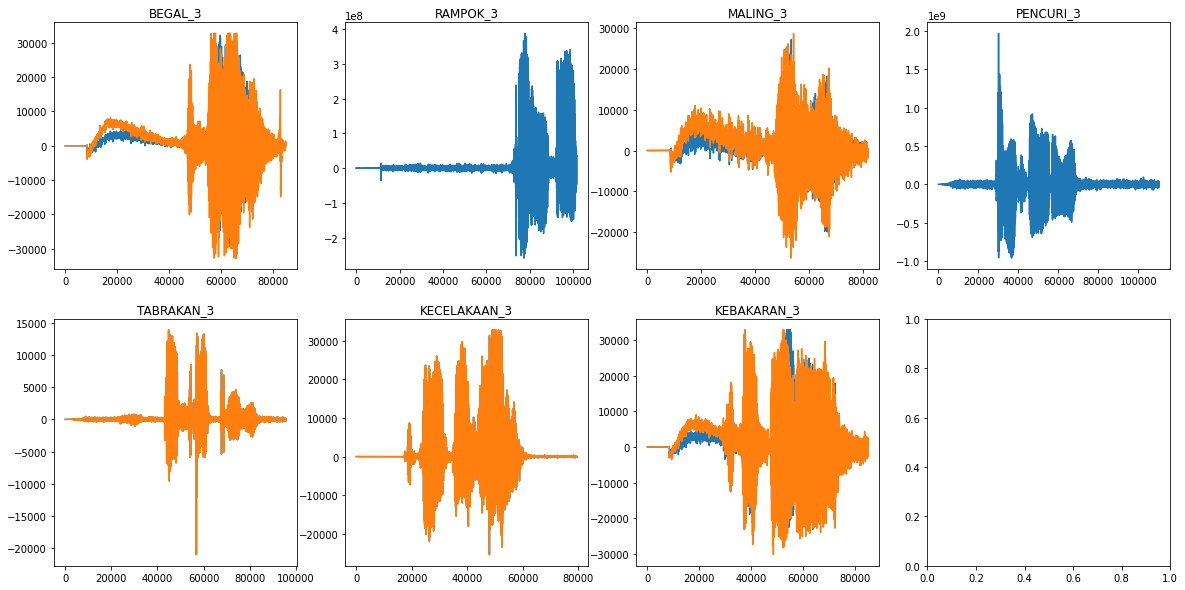

In [64]:
#Show Waveform Graph Random Data
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
iteration = next(iterator)

path = 'New Data/WAV/'
axes[0,0].plot(get_array(path,'begal',iteration))
axes[0,0].set_title(f'BEGAL_{iteration}')
axes[0,1].plot(get_array(path,'rampok',iteration))
axes[0,1].set_title(f'RAMPOK_{iteration}')
axes[0,2].plot(get_array(path,'maling',iteration))
axes[0,2].set_title(f'MALING_{iteration}')
axes[0,3].plot(get_array(path,'pencuri',iteration))
axes[0,3].set_title(f'PENCURI_{iteration}')
axes[1,0].plot(get_array(path,'tabrakan',iteration))
axes[1,0].set_title(f'TABRAKAN_{iteration}')
axes[1,1].plot(get_array(path,'kecelakaan',iteration))
axes[1,1].set_title(f'KECELAKAAN_{iteration}')
axes[1,2].plot(get_array(path,'kebakaran',iteration))
axes[1,2].set_title(f'KEBAKARAN_{iteration}')
plt.show()

In [65]:
outputoverlay = os.path.join(data_dir,'Overlay/')
#tes = os.path.join(data_dir,'WAV/RAMPOK/rampok_1.wav')
#overlay(tes,outputoverlay)

overlayfile = ["begal","rampok","maling","pencuri","tabrakan","kecelakaan","kebakaran"]

for i in overlayfile:
    for file in sorted(os.listdir(f'New Data/WAV/{i}/')):
        #Get all files
        file = os.path.join(f'New Data/WAV/{i}/{file}')
        outputpath = os.path.join(outputoverlay,i+"/")
        overlay(file,outputpath)

[Overlaying "kebakaran_9" with "JALANAN" Succeed]


In [72]:
#os.mkdir('New Data/FINAL')
finalsubfold = []
for i in insiden:
    finalsubfold.append(i.upper())
finalsubfold

try:
    for subfold in finalsubfold:
        os.mkdir(f'New Data/Final/{subfold}')
except:
    pass

#Move audio data in "WAV", "OVERLAY", and "PITCH" directory 
# into "FINAL" directory for creating model

categories = ['WAV','Overlay']
dir = 'New Data/'
for category in categories:
    for i in finalsubfold:
        try:
            filedir = f'{dir}{category}/{i}/'
            for file in sorted(os.listdir(filedir)):
                old = os.path.join(filedir,file)
                new = f'{dir}FINAL/{i}/{file}'
                shutil.move(old,new)
        except:
            pass


In [75]:
def convertAllFilesInDirectoryTo16Bit(directory):
    for file in os.listdir(directory):
         if(file.endswith('.wav')):
            nameSolo = file.rsplit('.', 1)[0]
            data, samplerate = sf.read(directory + file)                

            sf.write(directory + nameSolo + '.wav', data, samplerate, subtype='PCM_16')
            print("converting " + file + "to 16 - bit")

In [76]:
for e in insiden:
    old_dir = f'New Data/FINAL/{e}/'
    convertAllFilesInDirectoryTo16Bit(old_dir)


converting begal_1.wavto 16 - bit
converting begal_10.wavto 16 - bit
converting begal_10_HUJAN.wavto 16 - bit
converting begal_10_JALANAN.wavto 16 - bit
converting begal_11.wavto 16 - bit
converting begal_11_HUJAN.wavto 16 - bit
converting begal_11_JALANAN.wavto 16 - bit
converting begal_12.wavto 16 - bit
converting begal_12_HUJAN.wavto 16 - bit
converting begal_12_JALANAN.wavto 16 - bit
converting begal_13.wavto 16 - bit
converting begal_13_HUJAN.wavto 16 - bit
converting begal_13_JALANAN.wavto 16 - bit
converting begal_14.wavto 16 - bit
converting begal_14_HUJAN.wavto 16 - bit
converting begal_14_JALANAN.wavto 16 - bit
converting begal_15.wavto 16 - bit
converting begal_15_HUJAN.wavto 16 - bit
converting begal_15_JALANAN.wavto 16 - bit
converting begal_16.wavto 16 - bit
converting begal_16_HUJAN.wavto 16 - bit
converting begal_16_JALANAN.wavto 16 - bit
converting begal_17.wavto 16 - bit
converting begal_17_HUJAN.wavto 16 - bit
converting begal_17_JALANAN.wavto 16 - bit
converting beg